In [1]:
from mqt.yaqs.core.data_structures.networks import MPS, MPO
from mqt.yaqs import simulator
from mqt.yaqs.core.data_structures.simulation_parameters import AnalogSimParams, Observable
from mqt.yaqs.core.libraries.gate_library import X, Z, RuntimeCost
from mqt.yaqs.core.data_structures.noise_model import NoiseModel

import matplotlib.pyplot as plt
import numpy as np
import pickle

C:\Users\Aaron\AppData\Local\Temp\ipykernel_33368\260566070.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


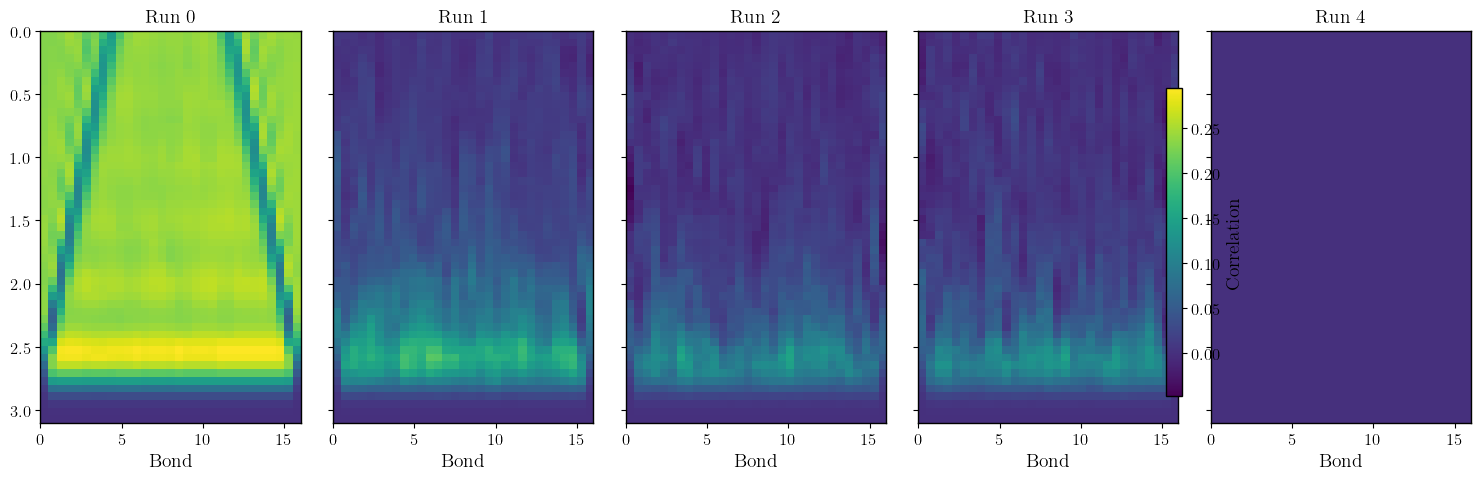

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle
import os

# ----- Configure global style -----
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 14,
    "font.size": 13,
    "axes.titlesize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "axes.linewidth": 1.0,
    "legend.fontsize": 12,
    "figure.figsize": (12, 6)
})

L = 16  # Number of sites/bonds
num_files = 5
dt = 0.1

data_list = []
nsteps = None

# Step 1: Load all data and determine global min/max
vmin = float('inf')
vmax = float('-inf')

for idx in range(num_files):
    filename = f"results_correlator_{idx}.pickle"
    if not os.path.exists(filename):
        print(f"File {filename} not found, skipping.")
        data_list.append(None)
        continue

    with open(filename, 'rb') as f:
        observables = pickle.load(f)

    data = [observable.results for observable in observables[0]]  # shape: [timesteps, sites]
    data = np.array(data).T
    data = np.flip(data)  # Rotate 180°

    vmin = min(vmin, np.min(data))
    vmax = max(vmax, np.max(data))
    data_list.append(data)

    if nsteps is None:
        nsteps = data.shape[1]

# Step 2: Plot with shared color scale
fig, axes = plt.subplots(1, num_files, figsize=(15, 5), sharey=True)

for idx, ax in enumerate(axes):
    data = data_list[idx]
    if data is None:
        continue

    im = ax.imshow(
        data,
        aspect="auto",
        extent=(0, L, dt * nsteps, 0),
        cmap='viridis',
        vmin=vmin,
        vmax=vmax
    )
    ax.set_title(f"Run {idx}")
    ax.set_xlabel("Bond")
    if idx == 0:
        ax.set_label("Time")

# Step 3: Shared colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
cbar.set_label("Correlation")

plt.tight_layout()
plt.show()


In [3]:
# t1_list = []
# t2_list = []
# t3_list = []
# t4_list = []
# t5_list = []
# for j in range(len(results)):
#     t1_list.append(results[j][9])
#     t2_list.append(results[j][19])
#     t3_list.append(results[j][29])
#     t4_list.append(results[j][39])
#     t5_list.append(results[j][49])

# plt.plot(gammas, t1_list, label='T=1')
# plt.plot(gammas, t2_list, label='T=2')
# plt.plot(gammas, t3_list, label='T=3')
# plt.plot(gammas, t4_list, label='T=4')
# plt.plot(gammas, t5_list, label='T=5')
# plt.legend()
# plt.xscale('log')

In [4]:
filename = "results_no_noise.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'results_no_noise.pickle'

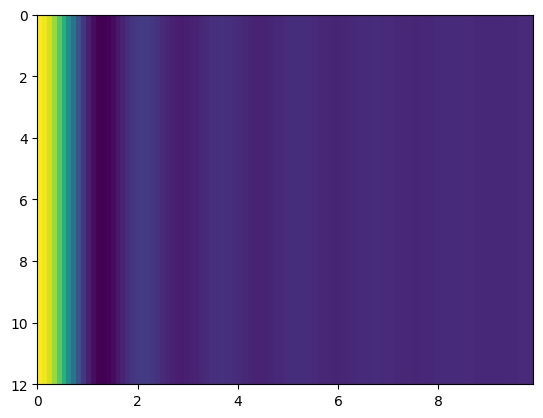

In [ ]:
heatmap = [observable.results for observable in results['exp_vals'][0::-2]]

fig, ax = plt.subplots(1, 1)
im = plt.imshow(heatmap, aspect="auto", extent=(0, 9.9, L, 0))

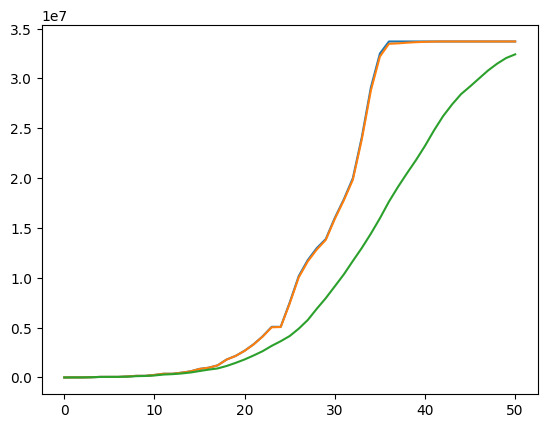

In [ ]:
filename = "results_gamma_0.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_1.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)

filename = "results_gamma_2.pickle"
with open(filename, 'rb') as f:
    results = pickle.load(f)
plt.plot(results['exp_vals'][-1].results)